In [1]:
import os

DATA_DIR = "../data/librispeech/LibriSpeech/dev-clean"
print("Speakers:", len(os.listdir(DATA_DIR)))


Speakers: 40


Sample rate: 16000
Duration (sec): 5.855


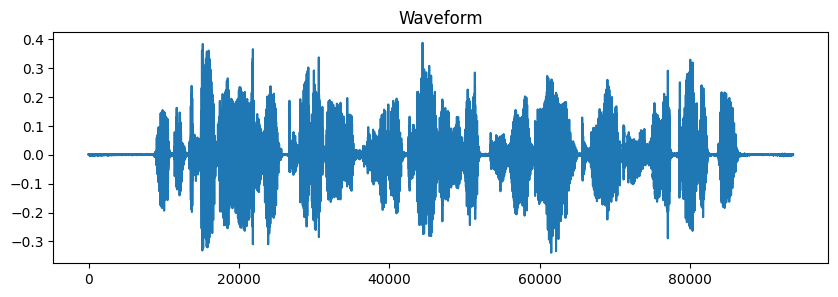

In [2]:
import librosa
import matplotlib.pyplot as plt

speaker = sorted(os.listdir(DATA_DIR))[0]
chapter = sorted(os.listdir(os.path.join(DATA_DIR, speaker)))[0]

chapter_path = os.path.join(DATA_DIR, speaker, chapter)
audio_file = [f for f in os.listdir(chapter_path) if f.endswith(".flac")][0]

audio_path = os.path.join(chapter_path, audio_file)

audio, sr = librosa.load(audio_path, sr=None)

print("Sample rate:", sr)
print("Duration (sec):", len(audio)/sr)

plt.figure(figsize=(10,3))
plt.plot(audio)
plt.title("Waveform")
plt.show()


In [3]:
transcript_file = [f for f in os.listdir(chapter_path) if f.endswith(".trans.txt")][0]

with open(os.path.join(chapter_path, transcript_file)) as f:
    for _ in range(5):
        print(f.readline().strip())


1272-128104-0000 MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL
1272-128104-0001 NOR IS MISTER QUILTER'S MANNER LESS INTERESTING THAN HIS MATTER
1272-128104-0002 HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMAS AND ROAST BEEF LOOMING BEFORE US SIMILES DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND
1272-128104-0003 HE HAS GRAVE DOUBTS WHETHER SIR FREDERICK LEIGHTON'S WORK IS REALLY GREEK AFTER ALL AND CAN DISCOVER IN IT BUT LITTLE OF ROCKY ITHACA
1272-128104-0004 LINNELL'S PICTURES ARE A SORT OF UP GUARDS AND AT EM PAINTINGS AND MASON'S EXQUISITE IDYLLS ARE AS NATIONAL AS A JINGO POEM MISTER BIRKET FOSTER'S LANDSCAPES SMILE AT ONE MUCH IN THE SAME WAY THAT MISTER CARKER USED TO FLASH HIS TEETH AND MISTER JOHN COLLIER GIVES HIS SITTER A CHEERFUL SLAP ON THE BACK BEFORE HE SAYS LIKE A SHAMPOOER IN A TURKISH BATH NEXT MAN


Total utterances: 2703
Min duration: 1.445
Max duration: 32.645
Mean duration: 7.175775342212357


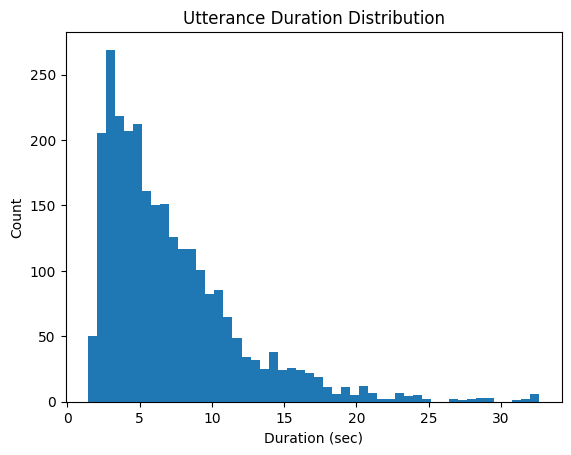

In [4]:
import numpy as np

durations = []

for speaker in os.listdir(DATA_DIR):
    for chapter in os.listdir(os.path.join(DATA_DIR, speaker)):
        chap_path = os.path.join(DATA_DIR, speaker, chapter)
        for f in os.listdir(chap_path):
            if f.endswith(".flac"):
                y, sr = librosa.load(os.path.join(chap_path, f), sr=None)
                durations.append(len(y)/sr)

durations = np.array(durations)

print("Total utterances:", len(durations))
print("Min duration:", durations.min())
print("Max duration:", durations.max())
print("Mean duration:", durations.mean())

plt.hist(durations, bins=50)
plt.xlabel("Duration (sec)")
plt.ylabel("Count")
plt.title("Utterance Duration Distribution")
plt.show()
